This is my practice during the #USAID_pause
Trying to make a user access way to view the DHS data directly through the website instead of going through Stata
Step 1: Access the API
Step 2: Build out how to get and wrangle data
Step 3: Develop the user interface to allow people to make changes on the data
Step 4: ???


In [2]:
#Import libraries.
from urllib.request import urlopen
import json
import seaborn as sns
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Polygon
from shapely.wkt import loads
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

C:\Users\mbride\AppData\Local\Temp\ipykernel_26584\3104321122.py:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\mbride\AppData\Local\Temp\ipykernel_26584\3104321122.py:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected word but

C:\Users\mbride\AppData\Local\Temp\ipykernel_26584\3796646740.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows_df2['location'] = unique_rows_df2['Polygon']


<Axes: xlabel='SurveyId', ylabel='Value'>

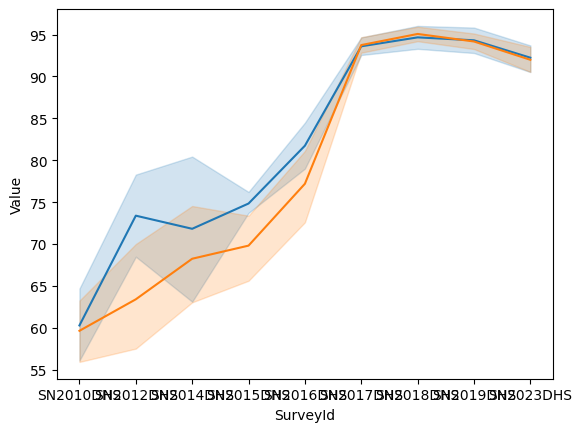

In [3]:
data_url = r'https://api.dhsprogram.com/rest/dhs/data?breakdown=Subnational&indicatorIds=RH_ANCP_W_NRS&countryIds=SN&surveyIds=SN2010DHS,SN2012DHS,SN2014DHS,SN2015DHS,SN2016DHS,SN2017DHS,SN2018DHS,SN2019DHS,SN2023DHS&lang=en&returnGeometry=true&f=json'
req = urlopen(data_url)
resp = json.loads(req.read())
my_data = resp['Data']
 

df = pd.DataFrame(my_data)


df['CharacteristicLabel'] = df['CharacteristicLabel'].str.replace(r'^\.+', '', regex=True)  # Remove leading periods
df['CharacteristicLabel'] = df['CharacteristicLabel'].str.replace(r'\s*\(.*\)$', '', regex=True)  # Remove brackets and content inside
df2 = df
def safe_wkt_load(wkt_str):
    try:
        # Attempt to load the WKT string into a shapely geometry object
        return wkt.loads(wkt_str)
    except Exception as e:
        # If there's an error (malformed WKT), return None or handle it as needed
        print(f"Error loading WKT: {e}")
        return None
df2['Polygon'] = df2['Coordinates'].apply(safe_wkt_load)
df2= df2.dropna(subset='Polygon')
unique_rows_df2 = df2.drop_duplicates(subset='CharacteristicLabel')
unique_rows_df2['location'] = unique_rows_df2['Polygon']
senegall = df.merge(unique_rows_df2[["CharacteristicLabel", "location"]], on='CharacteristicLabel', how='inner')
sns.lineplot(data=senegall, x="SurveyId", y="Value")
sns.lineplot(data=df, x="SurveyId", y="Value")


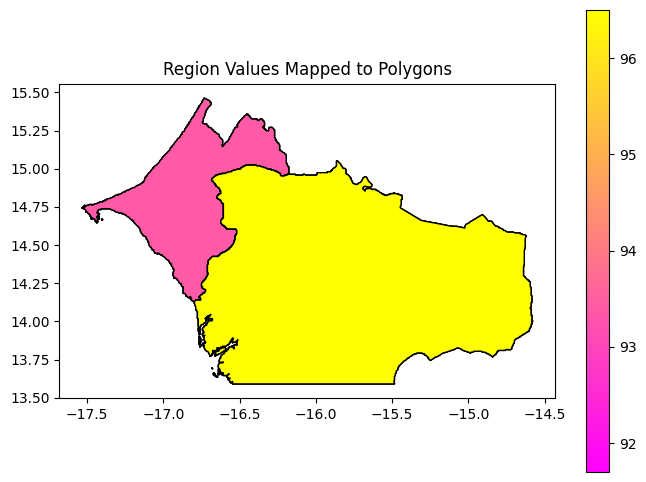

In [4]:

gdf = gpd.GeoDataFrame(senegall, geometry='location')
gdf_filter=gdf[gdf['SurveyYear']==2019]
# Plot the data
fig, ax = plt.subplots(figsize=(8, 6))
gdf_filter.plot(column='Value', cmap='spring', edgecolor='black', linewidth=1, legend=True, ax=ax)
ax.set_title("Region Values Mapped to Polygons")
plt.show()
